In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import csv
from matplotlib.offsetbox import AnchoredText

In [2]:
matplotlib.rcParams['font.family'] = 'stix'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (6, 4)

In [3]:
def load_data(filename):
    latencies = []
    with open(filename) as f:
        reader = csv.reader(f)
        for line in reader:
            latency = int(line[0])
            if latency > 0:
                latencies.append(latency)

    return np.array(latencies)

boost_spsc_data = load_data("boost_spsc.csv")
iceroyx_mpnc_data = load_data("iceoryx_mpnc.csv")

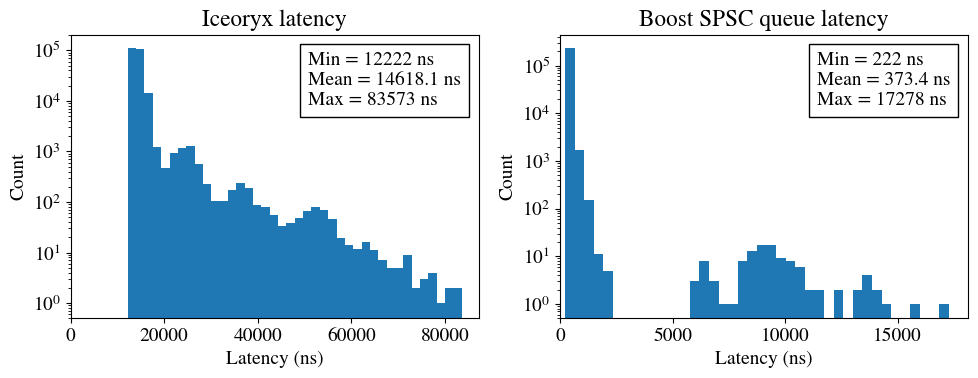

In [4]:
def plot_data(ax, data, bins=40):
    ax.hist(data, bins=bins)
    ax.set_yscale("log")
    ax.set_ylim(0.5, ax.get_ylim()[1])
    ax.set_xlim(0, ax.get_xlim()[1])
    at = AnchoredText("Min = {} ns\nMean = {:.1f} ns\nMax = {} ns".format(np.min(data), np.mean(data), np.max(data)), loc="upper right")
    ax.add_artist(at)
    ax.set_xlabel("Latency (ns)")
    ax.set_ylabel("Count")

fig = plt.figure(figsize=[10, 4])
ax = fig.add_subplot(1, 2, 1)
plot_data(ax, iceroyx_mpnc_data)
ax.set_title("Iceoryx latency")

ax = fig.add_subplot(1, 2, 2)
plot_data(ax, boost_spsc_data)
ax.set_title("Boost SPSC queue latency")
fig.tight_layout()